In [536]:
import pandas as pd
import numpy as np

# Base de donnée CIR

**Création des deux dataframe sur le CIR qui vont nous être utiles : avec les valeurs du CIR ou seulement 0/1**

In [537]:
df1 = pd.read_csv ('cir_data1.csv')
df1 = df1.dropna(subset=[col for col in df1.columns if col != 'siren'], how='all')
df1.rename(columns={ '2016_CIR' : 'CIR2016', '2017_CIR' : 'CIR2017', '2018_CIR' : 'CIR2018', '2019_CIR' : 'CIR2019', '2020_CIR' : 'CIR2020', '2021_CIR' : 'CIR2021', '2022_CIR' : 'CIR2022', '2023_CIR' : 'CIR2023'}, inplace=True)
df1

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
0,300022902,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,300153533,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,300398880,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,300400207,NaN,NaN,26214.4,0.0,NaN,0.0,0.0,0.0
4,300433935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
4893,841317340,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4894,899743660,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4895,814365292,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4896,842534216,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [538]:
df_CIR_0_1 = df1.copy()
df_CIR_0_1 =df_CIR_0_1.replace('oui', 1)
for col in df_CIR_0_1.columns:
    # Convert the column to string, remove spaces, then convert to float if possible
    df_CIR_0_1[col] = df_CIR_0_1[col].astype(str).str.replace(" ", "")
    df_CIR_0_1[col] = df_CIR_0_1[col].astype(float)
    df_CIR_0_1['siren'] = df_CIR_0_1['siren'].astype(int)
    
# Remplacer les valeurs > 0 par 1 pour les colonnes 2016_CIR à 2023_CIR dans le nouveau DataFrame
columns = ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']
for column in columns :
    df_CIR_0_1[column] = df_CIR_0_1[column].apply(lambda x: 1 if pd.notnull(x) and x > 0 else x)
df_CIR_0_1 = df_CIR_0_1[df_CIR_0_1['siren'].astype(str).str.startswith(('5' ,'6', '9'))]
df_CIR_0_1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
1409,500007802,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1410,500043880,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1411,500051495,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN
1412,500087242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1413,500144969,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0


In [539]:
df1 = df1[df1['siren'].astype(str).str.startswith(('5' ,'6', '9'))]
len (df1)

1675

In [540]:
df1 = df1.replace('oui', np.nan)
for col in df1.columns:
    # Convert the column to string, remove spaces, then convert to float if possible
    df1[col] = df1[col].astype(str).str.replace(" ", "")
    df1[col] = df1[col].astype(float)
    df1 ['siren'] = df1['siren'].astype(int)
df1

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023
1409,500007802,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1410,500043880,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1411,500051495,145000.0,158000.0,0.0,0.0,NaN,NaN,NaN,NaN
1412,500087242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1413,500144969,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3081,977450055,0.0,41979.0,NaN,0.0,NaN,0.0,113382.0,NaN
3082,985520154,0.0,0.0,0.0,0.0,1070427.0,480000.0,1102294.0,NaN
3083,986120186,77737.0,0.0,0.0,0.0,116334.0,0.0,0.0,0.0
3084,986720167,0.0,NaN,0.0,0.0,0.0,0.0,0.0,57998.0


In [541]:
df_siren = pd.read_csv('probable_CIR_ETI_GE.csv', sep =';', low_memory =False)
df_siren.columns

Index(['siren', 'nic', 'siret', 'statutDiffusionEtablissement',
       'dateCreationEtablissement', 'trancheEffectifsEtablissement',
       'anneeEffectifsEtablissement',
       'activitePrincipaleRegistreMetiersEtablissement',
       'dateDernierTraitementEtablissement', 'etablissementSiege',
       'etatAdministratifUniteLegale', 'statutDiffusionUniteLegale',
       'unitePurgeeUniteLegale', 'dateCreationUniteLegale',
       'categorieJuridiqueUniteLegale', 'denominationUniteLegale',
       'sigleUniteLegale', 'denominationUsuelle1UniteLegale',
       'denominationUsuelle2UniteLegale', 'denominationUsuelle3UniteLegale',
       'sexeUniteLegale', 'nomUniteLegale', 'nomUsageUniteLegale',
       'prenom1UniteLegale', 'prenom2UniteLegale', 'prenom3UniteLegale',
       'prenom4UniteLegale', 'prenomUsuelUniteLegale', 'pseudonymeUniteLegale',
       'activitePrincipaleUniteLegale',
       'nomenclatureActivitePrincipaleUniteLegale',
       'identifiantAssociationUniteLegale',
       'econom

In [542]:
df2 = pd.merge(df1, df_siren[['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale']], on='siren', how='left')
df2 ['division'] =  df2['activitePrincipaleUniteLegale'].str[:2]  # Extraire les deux premiers caractères
df2['somme_CIR'] = df2['CIR2016'].fillna(0) +df2['CIR2017'].fillna(0) +df2['CIR2018'].fillna(0) +df2['CIR2019'].fillna(0) +df2['CIR2020'].fillna(0) +df2['CIR2021'].fillna(0) +df2['CIR2022'].fillna(0)+df2['CIR2023'].fillna(0)
df2
df2.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR
0,500007802,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,25.12Z,ETI,2007-10-01,25,0.0
1,500043880,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,62.01Z,ETI,2007-10-01,62,0.0
2,500051495,145000.0,158000.0,0.0,0.0,NaN,NaN,NaN,NaN,29.32Z,ETI,2007-09-10,29,303000.0
3,500087242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.19Z,GE,2007-09-01,72,0.0
4,500144969,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,22.19Z,ETI,2007-09-06,22,0.0


In [543]:
df2_0_1 = pd.merge(df_CIR_0_1, df_siren[['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale']], on='siren', how='left')
df2_0_1['division'] = df2_0_1['activitePrincipaleUniteLegale'].str[:2] 
df2_0_1.head()

,siren,CIR2016,CIR2017,CIR2018,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division
0,500007802,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,25.12Z,ETI,2007-10-01,25
1,500043880,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,62.01Z,ETI,2007-10-01,62
2,500051495,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,29.32Z,ETI,2007-09-10,29
3,500087242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,72.19Z,GE,2007-09-01,72
4,500144969,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,22.19Z,ETI,2007-09-06,22


In [544]:
# Liste des colonnes à vérifier (les années de 2016 à 2023)
cir_columns = ['CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']

# Supprimer les lignes où toutes les colonnes CIR (de 2016 à 2023) sont NaN
df_cleaned = df2.dropna(subset=cir_columns, how='all')
df_cleaned_0_1 = df2_0_1.dropna(subset=cir_columns, how='all')
df_cleaned.columns

Index(['siren', 'CIR2016', 'CIR2017', 'CIR2018', 'CIR2019', 'CIR2020',
       'CIR2021', 'CIR2022', 'CIR2023', 'activitePrincipaleUniteLegale',
       'categorieEntreprise', 'dateCreationUniteLegale', 'division',
       'somme_CIR'],
      dtype='object')

# Statistiques descriptives

CIR2016    5.338167e+08
CIR2017    5.495557e+08
CIR2018    5.569266e+08
CIR2019    5.837387e+08
CIR2020    5.697162e+08
CIR2021    5.985946e+08
CIR2022    4.726519e+08
CIR2023    5.261986e+08
dtype: float64


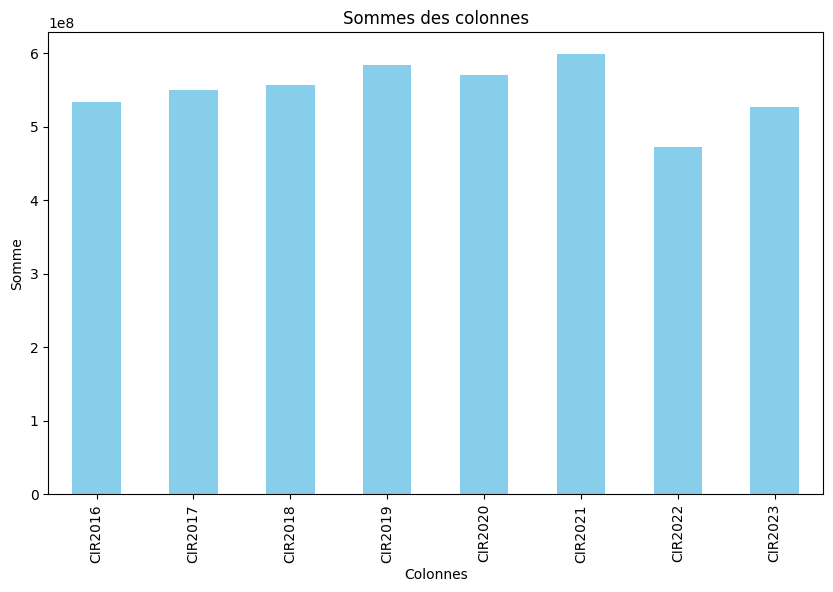

In [545]:
import matplotlib.pyplot as plt

# Calculer la somme de chaque colonne sauf 'siren'
col_sums = df1.drop(columns='siren').sum()
print (col_sums)
# Créer l'histogramme
plt.figure(figsize=(10, 6))
col_sums.plot(kind='bar', color='skyblue')
plt.title("Sommes des colonnes")
plt.xlabel("Colonnes")
plt.ylabel("Somme")

# Afficher l'histogramme
plt.show()

                    ETI            GE
CIR2016    1.984719e+08  3.353448e+08
CIR2017    2.015519e+08  3.480038e+08
CIR2018    1.862041e+08  3.707225e+08
CIR2019    2.082228e+08  3.755159e+08
CIR2020    2.327983e+08  3.369179e+08
CIR2021    2.697042e+08  3.288904e+08
CIR2022    2.119163e+08  2.607356e+08
CIR2023    2.939162e+08  2.322824e+08
somme_CIR  1.802786e+09  2.588413e+09
            ETI_moyenne    GE_moyenne
CIR2016    2.490237e+05  1.041444e+06
CIR2017    2.357332e+05  1.094352e+06
CIR2018    2.227321e+05  1.130252e+06
CIR2019    2.371558e+05  1.107716e+06
CIR2020    2.700676e+05  9.709451e+05
CIR2021    2.912572e+05  9.035451e+05
CIR2022    2.240130e+05  6.534728e+05
CIR2023    3.797367e+05  6.452288e+05
somme_CIR  1.477693e+06  5.688821e+06


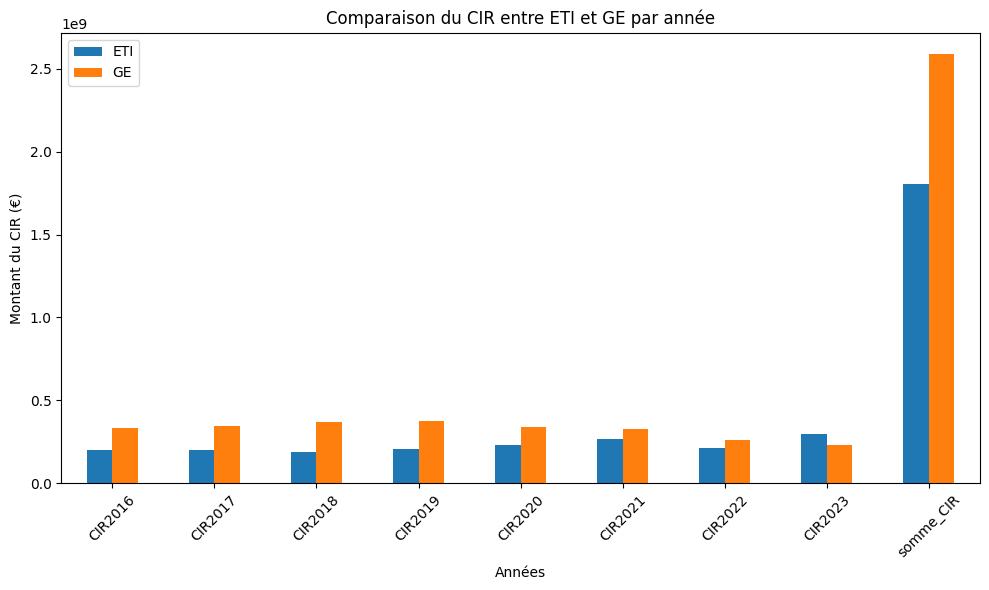

In [546]:
import pandas as pd

# Supposons que votre DataFrame ressemble à ceci :
# df contient les colonnes : 'siren', 'categorieEntreprise', '2016_CIR', '2017_CIR', ..., '2023_CIR'
# 'categorieEntreprise' doit contenir des valeurs comme 'ETI' et 'GE'.

# Filtrer les données en fonction de la catégorie d'entreprise
df_eti = df2[df2['categorieEntreprise'] == 'ETI']
df_ge = df2[df2['categorieEntreprise'] == 'GE']

# Calculer la somme du CIR pour chaque année pour chaque type d'entreprise
# Nous allons exclure les colonnes 'siren' et 'categorieEntreprise' pour le calcul des sommes.
eti_cir = df_eti.drop(columns=['siren', 'activitePrincipaleUniteLegale','categorieEntreprise', 'dateCreationUniteLegale','division']).sum()
ge_cir = df_ge.drop(columns=['siren', 'activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale','division']).sum()

# Créer un DataFrame avec les résultats pour la comparaison
comparaison = pd.DataFrame({
    'ETI': eti_cir,
    'GE': ge_cir
})

# Afficher la comparaison
print(comparaison)

# Si vous voulez calculer des statistiques comme la moyenne, l'écart-type, etc.
eti_mean = df_eti.drop(columns=['siren', 'activitePrincipaleUniteLegale','categorieEntreprise', 'dateCreationUniteLegale','division']).mean()
ge_mean = df_ge.drop(columns=['siren','activitePrincipaleUniteLegale', 'categorieEntreprise', 'dateCreationUniteLegale','division']).mean()

# Créer un DataFrame pour afficher les moyennes
moyenne_comparaison = pd.DataFrame({
    'ETI_moyenne': eti_mean,
    'GE_moyenne': ge_mean
})

# Afficher la moyenne du CIR pour chaque année
print(moyenne_comparaison)

# Vous pouvez aussi visualiser cette comparaison sous forme de graphique (si nécessaire)
import matplotlib.pyplot as plt

# Comparaison sous forme de graphique pour chaque année
comparaison.plot(kind='bar', figsize=(10, 6))
plt.title('Comparaison du CIR entre ETI et GE par année')
plt.ylabel('Montant du CIR (€)')
plt.xlabel('Années')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [547]:
# 1. Extraire le secteur d'activité (les 2 premiers chiffres de la nomenclature NAF)


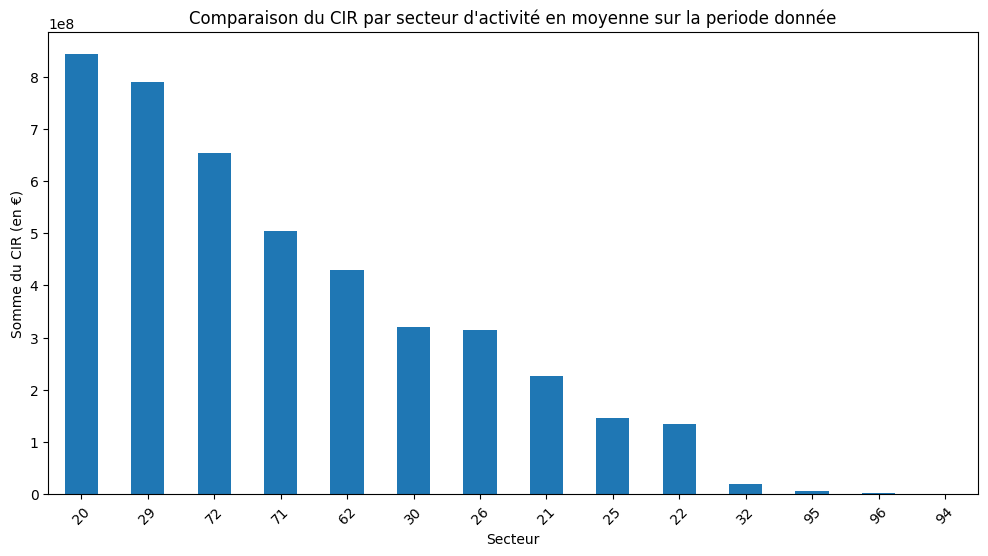

In [548]:
# Calculer la somme du CIR par secteur
secteur_cir = df2.groupby('division')['somme_CIR'].sum().sort_values(ascending=False)

# Visualisation sous forme de barres
secteur_cir.plot(kind='bar', figsize=(12, 6))
plt.title('Comparaison du CIR par secteur d\'activité en moyenne sur la periode donnée')
plt.xlabel('Secteur')
plt.ylabel('Somme du CIR (en €)')
plt.xticks(rotation=45)
plt.show()

In [549]:
# Sauvegarder le DataFrame mis à jour dans le fichier CSV
df2.to_csv('cir_5_6_9_finie.CSV', index=False)

print(f"Fichier '{'cir_5_6_9_finie.csv'}' mis à jour avec succès.")

Fichier 'cir_5_6_9_finie.csv' mis à jour avec succès.


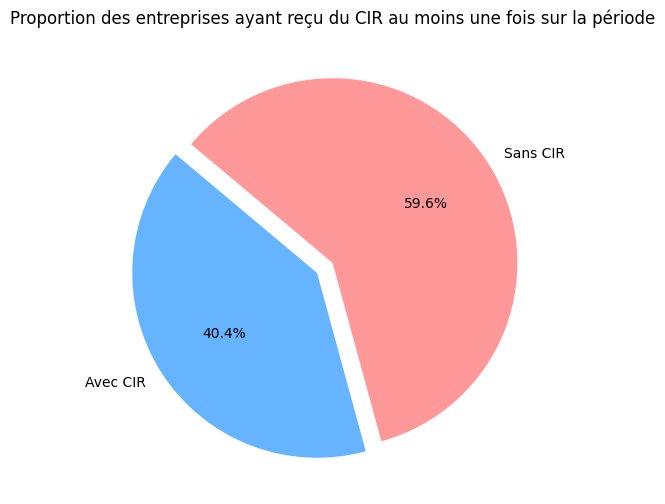

In [550]:
import matplotlib.pyplot as plt
#df2['somme_CIR'] = df2['somme_CIR'].fillna(0)
# Calculer le nombre d'entreprises qui ne reçoivent pas de CIR (soit 0, soit NaN à l'origine) ???

# Comptage des entreprises avec et sans CIR
entreprises_avec_CIR = len(df2[df2['somme_CIR'] > 0])
entreprises_sans_CIR = len(df2[df2['somme_CIR'] == 0])

# Données pour le camembert
labels = ['Avec CIR', 'Sans CIR']
sizes = [entreprises_avec_CIR, entreprises_sans_CIR]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # Mettre en valeur la part 'Avec CIR'

# Création du diagramme en camembert
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion des entreprises ayant reçu du CIR au moins une fois sur la période')
plt.show()

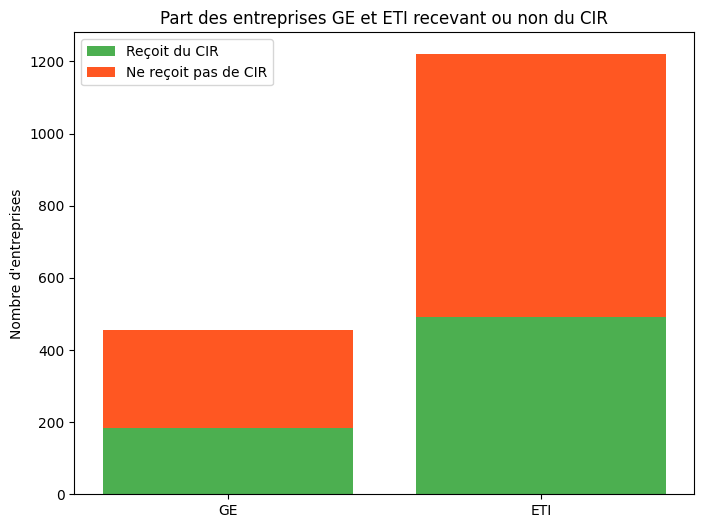

In [551]:
import matplotlib.pyplot as plt

# Filtrer les données pour chaque catégorie
total_GE = df2[df2['categorieEntreprise'] == 'GE'].shape[0]
total_ETI = df2[df2['categorieEntreprise'] == 'ETI'].shape[0]

# Comptage des entreprises GE et ETI recevant ou non du CIR
GE_recevant_CIR = df2[(df2['categorieEntreprise'] == 'GE') & (df2['somme_CIR'] > 0)].shape[0]
ETI_recevant_CIR = df2[(df2['categorieEntreprise'] == 'ETI') & (df2['somme_CIR'] > 0)].shape[0]
GE_sans_CIR = total_GE - GE_recevant_CIR
ETI_sans_CIR = total_ETI - ETI_recevant_CIR

# Préparer les données pour l'histogramme empilé
categories = ['GE', 'ETI']
recevant_CIR = [GE_recevant_CIR, ETI_recevant_CIR]
sans_CIR = [GE_sans_CIR, ETI_sans_CIR]

# Création de l'histogramme empilé
plt.figure(figsize=(8, 6))
plt.bar(categories, recevant_CIR, label='Reçoit du CIR', color='#4CAF50')
plt.bar(categories, sans_CIR, bottom=recevant_CIR, label='Ne reçoit pas de CIR', color='#FF5722')

# Ajouter les labels et légende
plt.ylabel('Nombre d\'entreprises')
plt.title('Part des entreprises GE et ETI recevant ou non du CIR')
plt.legend()

# Affichage
plt.show()

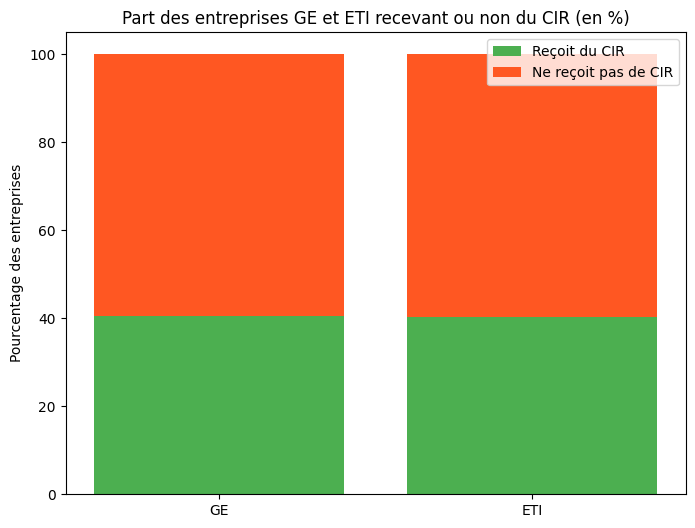

In [552]:
import matplotlib.pyplot as plt

# Filtrer les données pour chaque catégorie
total_GE = df2[df2['categorieEntreprise'] == 'GE'].shape[0]
total_ETI = df2[df2['categorieEntreprise'] == 'ETI'].shape[0]

# Comptage des entreprises GE et ETI recevant ou non du CIR
GE_recevant_CIR = df2[(df2['categorieEntreprise'] == 'GE') & (df2['somme_CIR'] > 0)].shape[0]
ETI_recevant_CIR = df2[(df2['categorieEntreprise'] == 'ETI') & (df2['somme_CIR'] > 0)].shape[0]
GE_sans_CIR = total_GE - GE_recevant_CIR
ETI_sans_CIR = total_ETI - ETI_recevant_CIR

# Convertir les comptages en pourcentages
GE_recevant_CIR_pct = GE_recevant_CIR / total_GE * 100 if total_GE > 0 else 0
GE_sans_CIR_pct = GE_sans_CIR / total_GE * 100 if total_GE > 0 else 0
ETI_recevant_CIR_pct = ETI_recevant_CIR / total_ETI * 100 if total_ETI > 0 else 0
ETI_sans_CIR_pct = ETI_sans_CIR / total_ETI * 100 if total_ETI > 0 else 0

# Préparer les données pour l'histogramme empilé en pourcentages
categories = ['GE', 'ETI']
recevant_CIR_pct = [GE_recevant_CIR_pct, ETI_recevant_CIR_pct]
sans_CIR_pct = [GE_sans_CIR_pct, ETI_sans_CIR_pct]

# Création de l'histogramme empilé en pourcentages
plt.figure(figsize=(8, 6))
plt.bar(categories, recevant_CIR_pct, label='Reçoit du CIR', color='#4CAF50')
plt.bar(categories, sans_CIR_pct, bottom=recevant_CIR_pct, label='Ne reçoit pas de CIR', color='#FF5722')

# Ajouter les labels et légende
plt.ylabel('Pourcentage des entreprises')
plt.title('Part des entreprises GE et ETI recevant ou non du CIR (en %)')
plt.legend()

# Affichage
plt.show()

# Base de données brevets

In [553]:
df_patents_9 = pd.read_csv('BREVETS_orbis_siren9.csv')
df_patents_9.nunique()

SIREN               10
Famille ID         204
Brevet            1001
Date de Dépôt      279
Année de Dépôt       7
2016                 2
2017                 2
2018                 2
2019                 2
2020                 2
2021                 2
2022                 2
2023                 1
2024                 1
dtype: int64

In [554]:
df_patents_6 = pd.read_csv('BREVETS_siren6.csv', sep =';')
df_patents_6.nunique()

SIREN                91
Famille ID         5391
Brevet            30226
Date de Dépôt      6605
Année de Dépôt       94
2016                  2
2017                  2
2018                  2
2019                  2
2020                  2
2021                  2
2022                  2
2023                  1
2024                  1
dtype: int64

In [555]:
df_patents_5 = pd.read_csv('BREVETS_siren5.csv', sep =';')
df_patents_5['SIREN'] = df_patents_5['SIREN'].astype(str)

# Filtrer les lignes où 'siren' commence par '5'
df_patents_5= df_patents_5[df_patents_5['SIREN'].str.startswith('5')]
df_patents_5.nunique()

SIREN                190
Famille ID         36841
Brevet            114272
Date de Dépôt       9935
Année de Dépôt       121
2016                   2
2017                   2
2018                   2
2019                   2
2020                   2
2021                   2
2022                   2
2023                   1
2024                   1
dtype: int64

In [556]:
df_patents = pd.concat([df_patents_6, df_patents_9, df_patents_5], axis=0, ignore_index=True)

df_patents = df_patents[['SIREN', 'Famille ID','Brevet', 'Année de Dépôt']]
df_patents = df_patents.dropna(subset=['Année de Dépôt'])
df_patents['Année de Dépôt'] = df_patents['Année de Dépôt'].astype(int)
df_patents = df_patents[df_patents['Année de Dépôt'] >= 2016]

df_patents.to_csv('brevet_6_5_9.CSV', index=False)

print(f"Fichier '{'brevet_6_5_9.CSV'}' mis à jour avec succès.")
df_patents

Fichier 'brevet_6_5_9.CSV' mis à jour avec succès.


,SIREN,Famille ID,Brevet,Année de Dépôt
3,600 801 468,62528586.0,FR3078094B1,2018
13,600 801 468,62528586.0,PT3530851T,2019
17,600 801 468,72644464.0,FR3111929A1,2020
52,600 801 468,61132606.0,FR3073394A1,2017
54,600 801 468,62528586.0,EP3530851B1,2019
...,...,...,...,...
145427,552 075 749,75439068.0,FR3120757A1,2021
145458,552 075 749,67742870.0,FR3098881B1,2019
145464,552 075 749,67742870.0,CN112228434A,2020
145469,552 075 749,67742868.0,FR3098884B1,2019


In [557]:
df_grouped = df_patents.groupby('Famille ID').agg({
    'SIREN': 'first',  # Prendre la première valeur (supposons que le SIREN est identique pour chaque famille)
    'Brevet': lambda x: ', '.join(x),  # Joindre les brevets par une virgule
    'Année de Dépôt': 'min',  # Même logique pour l'année de dépôt

}).reset_index()
df_grouped

,Famille ID,SIREN,Brevet,Année de Dépôt
0,8228630.0,673 620 399,"US2017145524A1, US2017137900A1",2016
1,9951976.0,622 037 083,US2017127681A1,2017
2,29286233.0,542 019 096,"US2018077476A1, US10841674B2",2017
3,34936734.0,542 019 096,US2016381444A1,2016
4,34948873.0,673 620 399,US2016177370A1,2016
...,...,...,...,...
10157,83404457.0,542 065 479,CN115139758A,2021
10158,83406713.0,504 940 925,CN115150085A,2022
10159,83407065.0,504 940 925,CN115146306A,2022
10160,83407151.0,504 940 925,CN115146290A,2022


In [558]:
# Définir les années pour lesquelles on souhaite créer les colonnes
years = list(range(2016, 2025))

# Créer une colonne pour chaque année avec des valeurs par défaut à 0
for year in years:
    df_grouped[year] = 0

# Mettre un 1 dans la colonne de l'année de dépôt correspondante
for index, row in df_grouped.iterrows():
    year = row['Année de Dépôt']
    if year in years:
        df_grouped.at[index, year] = 1

In [559]:
df_grouped.head(10)

,Famille ID,SIREN,Brevet,Année de Dépôt,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,8228630.0,673 620 399,"US2017145524A1, US2017137900A1",2016,1,0,0,0,0,0,0,0,0
1,9951976.0,622 037 083,US2017127681A1,2017,0,1,0,0,0,0,0,0,0
2,29286233.0,542 019 096,"US2018077476A1, US10841674B2",2017,0,1,0,0,0,0,0,0,0
3,34936734.0,542 019 096,US2016381444A1,2016,1,0,0,0,0,0,0,0,0
4,34948873.0,673 620 399,US2016177370A1,2016,1,0,0,0,0,0,0,0,0
5,35005756.0,673 620 399,US2021207220A1,2021,0,0,0,0,0,1,0,0,0
6,36269385.0,542 019 096,"US10779361B2, US2019297672A1",2019,0,0,0,1,0,0,0,0,0
7,36387153.0,622 037 083,"NO20161409A1, NO343040B1",2016,1,0,0,0,0,0,0,0,0
8,36572019.0,673 620 399,"US2020071742A1, US10494658B2, US2021363563A1, ...",2016,1,0,0,0,0,0,0,0,0
9,37742414.0,542 019 096,"US9565087B2, US2016134499A1",2016,1,0,0,0,0,0,0,0,0


In [560]:
df_grouped = df_grouped.groupby('SIREN').agg(
    {**{col: 'sum' for col in [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]},  # Somme des colonnes CIR
     'Famille ID': lambda x: ', '.join(map(str, x)),  # Concaténation des Famille ID après conversion en str
     'Année de Dépôt': lambda x: ', '.join(map(str, x))  # Concaténation des Année de Dépôt après conversion en str
    }).reset_index()

df_grouped.rename(columns={'SIREN': 'siren', 2016 : 'brevets2016', 2017 : 'brevets2017', 2018 : 'brevets2018', 2019 : 'brevets2019', 2020 : 'brevets2020', 2021 : 'brevets2021', 2022 : 'brevets2022', 2023 : 'brevets2023', 2024 : 'brevets2024'}, inplace=True)
df_grouped.head()

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,Famille ID,Année de Dépôt
0,500 212 188,0,0,0,0,1,0,0,0,0,68210849.0,2020
1,500 440 813,3,0,3,3,1,1,0,0,0,"54066016.0, 54199828.0, 54291442.0, 66286513.0...","2016, 2016, 2016, 2018, 2018, 2018, 2019, 2019..."
2,500 971 601,0,0,1,0,0,0,0,0,0,63407421.0,2018
3,501 097 760,14,4,2,0,0,0,0,0,0,"54065980.0, 54366284.0, 54783719.0, 54783720.0...","2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016..."
4,501 161 798,25,1,1,5,0,0,0,0,0,"55073011.0, 55073014.0, 55135375.0, 55135376.0...","2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016..."


In [561]:
df_grouped['siren'] = df_grouped['siren'].astype(str).str.replace(' ', '').astype(int)

In [562]:
df_merged = pd.merge(df_grouped, df_cleaned, on='siren', how='left')
df_merged['categorieEntreprise'] = df_merged['categorieEntreprise'].apply(lambda x: 0 if x == 'GE' else 1)
df_merged['dateCreationUniteLegale'] = pd.to_datetime(df_merged['dateCreationUniteLegale']).dt.year

In [563]:
df_merged.head()

,siren,brevets2016,brevets2017,brevets2018,brevets2019,brevets2020,brevets2021,brevets2022,brevets2023,brevets2024,...,CIR2019,CIR2020,CIR2021,CIR2022,CIR2023,activitePrincipaleUniteLegale,categorieEntreprise,dateCreationUniteLegale,division,somme_CIR
0,500212188,0,0,0,0,1,0,0,0,0,...,0.0,0.0,12514145.0,0.0,0.0,29.32Z,1,2007.0,29,12827479.0
1,500440813,3,0,3,3,1,1,0,0,0,...,4662143.0,3053529.0,4659805.0,15312468.0,0.0,62.01Z,0,2007.0,62,43118696.0
2,500971601,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,NaN,25.29Z,1,2007.0,25,0.0
3,501097760,14,4,2,0,0,0,0,0,0,...,0.0,0.0,80374.0,0.0,0.0,71.12B,0,2007.0,71,80374.0
4,501161798,25,1,1,5,0,0,0,0,0,...,3818828.0,3996248.0,6042670.0,2307076.0,1900030.0,29.10Z,0,2007.0,29,27120852.0


In [564]:
# Créer une copie du DataFrame
df_0_1 = df_merged.copy()

# Remplacer les valeurs > 0 par 1 pour les colonnes 2016_CIR à 2023_CIR dans le nouveau DataFrame
columns = ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']
for column in columns :
    df_0_1[column] = df_0_1[column].apply(lambda x: 1 if x > 0 else 0)

df_0_1['division'] = df_0_1['division'].astype(str)

# Statistiques descriptives

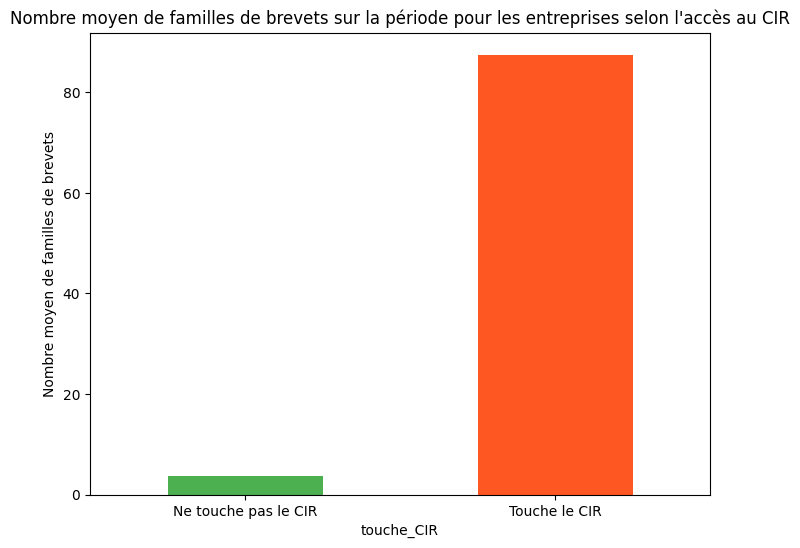

In [565]:
# Déterminer si une entreprise touche du CIR
df_0_1['touche_CIR'] = df_0_1[['CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023']].sum(axis=1) > 0

# Calculer le nombre moyen de familles de brevets de 2016 à 2024 pour chaque entreprise
annees_brevets = [f'brevets{year}' for year in range(2016, 2025)]
df_0_1['somme_brevets'] = df_0_1[annees_brevets].sum(axis=1)

# Calculer la moyenne des familles de brevets pour chaque groupe (avec ou sans CIR)
moyenne_brevets_par_CIR = df_0_1.groupby('touche_CIR')['somme_brevets'].mean()

# Tracer le graphique
plt.figure(figsize=(8, 6))
moyenne_brevets_par_CIR.plot(kind='bar', color=['#4CAF50', '#FF5722'], legend=False)
plt.title("Nombre moyen de familles de brevets sur la période pour les entreprises selon l'accès au CIR")
plt.ylabel("Nombre moyen de familles de brevets")
plt.xticks(ticks=[0, 1], labels=["Ne touche pas le CIR", "Touche le CIR"], rotation=0)
plt.show()

# Première régression

In [566]:
import statsmodels.formula.api as smf

# Assurez-vous que la variable Division est catégorielle
df_0_1['division'] = df_0_1['division'].astype('category')

# Construire la formule avec un `+` entre les variables
formula = 'CIR2022 ~ C(division,Treatment("72")) + brevets2016 + categorieEntreprise + dateCreationUniteLegale'

# Ajuster le modèle OLS avec la formule
reg = smf.ols(formula=formula, data=df_0_1).fit()

# Résumé des résultats
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                CIR2022   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     2.275
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00940
Time:                        21:14:26   Log-Likelihood:                -98.452
No. Observations:                 156   AIC:                             224.9
Df Residuals:                     142   BIC:                             267.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

# Réalisation d'un panel

**Réalisation d'un panel avec 0/1 comme valeurs pour le CIR**

In [605]:
df_melted_CIR_0_1 = pd.melt(df_cleaned_0_1, 
                    id_vars=['siren', 'division', 'categorieEntreprise', 'dateCreationUniteLegale'],  # Colonnes à garder
                    value_vars= ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='CIR')  # Nom de la nouvelle colonne pour les valeurs de CIR
df_melted_CIR_0_1['annee'] = df_melted_CIR_0_1['annee'].str.replace('CIR', '', regex=False).astype(int)
df_melted_CIR_0_1['siren']= df_melted_CIR_0_1['siren'].astype(int)


In [606]:
df_melted_CIR_0_1.head()

,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR
0,500007802,25,ETI,2007-10-01,2016,NaN
1,500043880,62,ETI,2007-10-01,2016,0.0
2,500051495,29,ETI,2007-09-10,2016,1.0
3,500087242,72,GE,2007-09-01,2016,0.0
4,500144969,22,ETI,2007-09-06,2016,NaN


In [607]:
df_melted_brevets = pd.melt(df_grouped, 
                    id_vars=['siren'],  # Colonnes à garder
                    value_vars= ['brevets2016', 'brevets2017', 'brevets2018', 'brevets2019','brevets2020', 'brevets2021', 'brevets2022', 'brevets2023', 'brevets2024'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='nb_brevets')  # Nom de la nouvelle colonne pour le nombre de brevets
df_melted_brevets['annee'] = df_melted_brevets['annee'].str.replace('brevets', '', regex=False).astype(int)
df_melted_brevets['siren']= df_melted_brevets['siren'].astype(str).str.replace(' ', '').astype(int)

In [608]:
df_melted_brevets.head()

,siren,annee,nb_brevets
0,500212188,2016,0
1,500440813,2016,3
2,500971601,2016,0
3,501097760,2016,14
4,501161798,2016,25


In [609]:
panel_0_1 = pd.merge(df_melted_CIR_0_1, df_melted_brevets, on=['siren', 'annee'], how='outer')
panel_0_1['Id_ETI'] = panel_0_1['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})

panel_0_1.head()

/var/folders/1x/8mn2n5ks0mnb44wq8yxkmm5m0000gn/T/ipykernel_59889/2793106153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  panel_0_1['Id_ETI'] = panel_0_1['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI
0,500007802,25,ETI,2007-10-01,2016,NaN,NaN,1.0
1,500007802,25,ETI,2007-10-01,2017,NaN,NaN,1.0
2,500007802,25,ETI,2007-10-01,2018,NaN,NaN,1.0
3,500007802,25,ETI,2007-10-01,2019,0.0,NaN,1.0
4,500007802,25,ETI,2007-10-01,2020,0.0,NaN,1.0


In [610]:
panel_0_1['dateCreationUniteLegale'] = pd.to_datetime(panel_0_1['dateCreationUniteLegale'], errors='coerce')

# Créer la nouvelle colonne 'anne_creation' qui extrait l'année
panel_0_1['annee_creation'] = panel_0_1['dateCreationUniteLegale'].dt.year
panel_0_1.head()


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
0,500007802,25,ETI,2007-10-01,2016,NaN,NaN,1.0,2007.0
1,500007802,25,ETI,2007-10-01,2017,NaN,NaN,1.0,2007.0
2,500007802,25,ETI,2007-10-01,2018,NaN,NaN,1.0,2007.0
3,500007802,25,ETI,2007-10-01,2019,0.0,NaN,1.0,2007.0
4,500007802,25,ETI,2007-10-01,2020,0.0,NaN,1.0,2007.0


**Réalisation d'un panel avec les montants du CIR perçu**

In [611]:
df_melted_CIR = pd.melt(df_cleaned, 
                    id_vars=['siren', 'division', 'categorieEntreprise', 'dateCreationUniteLegale'],  # Colonnes à garder
                    value_vars= ['CIR2016','CIR2017','CIR2018','CIR2019', 'CIR2020', 'CIR2021', 'CIR2022', 'CIR2023'],  # Colonnes à fondre
                    var_name='annee',  # Nom de la nouvelle colonne pour les années
                    value_name='CIR')  # Nom de la nouvelle colonne pour les valeurs de CIR
df_melted_CIR['annee'] = df_melted_CIR['annee'].str.replace('CIR', '', regex=False).astype(int)
df_melted_CIR['siren']= df_melted_CIR['siren'].astype(int)


In [612]:
panel = pd.merge(df_melted_CIR, df_melted_brevets, on=['siren', 'annee'], how='outer')
panel['dateCreationUniteLegale'] = pd.to_datetime(panel['dateCreationUniteLegale'], errors='coerce')
# Créer la nouvelle colonne 'anne_creation' qui extrait l'année
panel['Id_ETI'] = panel['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})
panel['annee_creation'] = panel['dateCreationUniteLegale'].dt.year
panel['annee_creation'] = panel['dateCreationUniteLegale'].dt.year
panel.head()


/var/folders/1x/8mn2n5ks0mnb44wq8yxkmm5m0000gn/T/ipykernel_59889/4261549653.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  panel['Id_ETI'] = panel['categorieEntreprise'].replace({'GE': 0, 'ETI': 1})


,siren,division,categorieEntreprise,dateCreationUniteLegale,annee,CIR,nb_brevets,Id_ETI,annee_creation
0,500007802,25,ETI,2007-10-01,2016,NaN,NaN,1.0,2007.0
1,500007802,25,ETI,2007-10-01,2017,NaN,NaN,1.0,2007.0
2,500007802,25,ETI,2007-10-01,2018,NaN,NaN,1.0,2007.0
3,500007802,25,ETI,2007-10-01,2019,0.0,NaN,1.0,2007.0
4,500007802,25,ETI,2007-10-01,2020,0.0,NaN,1.0,2007.0


Corrélation entre le montant du CIR reçu et le nombre de brevets perçu : 

In [613]:
correlation = panel[['CIR', 'nb_brevets']].corr()
print(correlation)

                 CIR  nb_brevets
CIR         1.000000    0.511895
nb_brevets  0.511895    1.000000


# Deuxième tentative de régression

In [614]:
panel_0_1 = panel_0_1.drop(columns=[ 'categorieEntreprise','dateCreationUniteLegale'])
panel = panel.drop(columns=['categorieEntreprise','dateCreationUniteLegale'])

In [624]:
panel_0_1['nb_brevets'] = panel_0_1['nb_brevets'].fillna(0)
panel_0_1['RetD'] = panel_0_1.apply(lambda row: row['nb_brevets'] if row['annee'] == 2016 else 0, axis=1)
panel_0_1 = panel_0_1.dropna(subset=['CIR'])
panel['nb_brevets'] = panel['nb_brevets'].fillna(0)
panel['RetD'] = panel.apply(lambda row: row['nb_brevets'] if row['annee'] == 2016 else 0, axis=1)
panel= panel.dropna(subset=['CIR'])

In [625]:
panel_0_1.isna().sum()

siren             0
division          0
annee             0
CIR               0
nb_brevets        0
Id_ETI            0
annee_creation    0
RetD              0
section           0
dtype: int64

**Modèle linéaire :**

In [626]:
model = smf.ols('CIR ~ C(division,Treatment("72")) + C(annee) + Id_ETI + annee_creation + RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CIR   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     32.96
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.52e-139
Time:                        21:23:31   Log-Likelihood:                -5101.1
No. Observations:                9702   AIC:                         1.025e+04
Df Residuals:                    9678   BIC:                         1.042e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

**Modèle logit :**

In [627]:
model = smf.logit('CIR ~  C(annee) + Id_ETI + annee_creation+ RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.531403
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                 9702
Model:                          Logit   Df Residuals:                     9691
Method:                           MLE   Df Model:                           10
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.02907
Time:                        21:23:33   Log-Likelihood:                -5155.7
converged:                       True   LL-Null:                       -5310.0
Covariance Type:            nonrobust   LLR p-value:                 2.263e-60
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           23.8949      1.549     15.425      0.000      20.859      26.931
C(annee)[T.

Le modèle parvient à converger pour la régression : 
$$ CIR \sim  année +Id_{ETI} + annee_creation+ R\&D$$
Mais il ne parvient pas à converger lorsque l'on rajoute le secteur d'activité dans la regression.

In [628]:
model = smf.logit('CIR ~  C(division,Treatment("72"))+ C(annee) + Id_ETI + annee_creation+ RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit(maxiter=500, tol=1e-5)

# Résumé des résultats
print(result.summary())

         Current function value: 0.509841
         Iterations: 500
                           Logit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                 9702
Model:                          Logit   Df Residuals:                     9678
Method:                           MLE   Df Model:                           23
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.06846
Time:                        21:23:38   Log-Likelihood:                -4946.5
converged:                      False   LL-Null:                       -5310.0
Covariance Type:            nonrobust   LLR p-value:                8.780e-139
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             18.0884      1.780     10.165      0.000      14.601     

/Users/eleonoregrison/miniconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Essayons de réduire le nombre de secteurs : 

In [629]:
panel_0_1['section'] = panel_0_1['division'].replace({
    '20': 'C', '21': 'C', '22': 'C', '25' :'C', '26':'C', '29' : 'C', '30' : 'C', '31':'C', '32':'C', '62':'J', '71':'M', '72':'M', '94':'S', '95':'S', '96' :'S'
})

In [630]:
model = smf.logit('CIR ~  C(section)+ C(annee) + Id_ETI + annee_creation+ RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit(maxiter=500, tol=1e-5)

# Résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518926
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                 9702
Model:                          Logit   Df Residuals:                     9688
Method:                           MLE   Df Model:                           13
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.05186
Time:                        21:23:39   Log-Likelihood:                -5034.6
converged:                       True   LL-Null:                       -5310.0
Covariance Type:            nonrobust   LLR p-value:                2.329e-109
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           18.1218      1.723     10.519      0.000      14.745      21.498
C(section)[

**Modèle probit :**

In [631]:
model = smf.probit('CIR ~ C(section) + C(annee) + Id_ETI + annee_creation + RetD', data=panel_0_1)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.518796
         Iterations 8
                          Probit Regression Results                           
Dep. Variable:                    CIR   No. Observations:                 9702
Model:                         Probit   Df Residuals:                     9688
Method:                           MLE   Df Model:                           13
Date:                Sun, 10 Nov 2024   Pseudo R-squ.:                 0.05210
Time:                        21:23:39   Log-Likelihood:                -5033.4
converged:                       True   LL-Null:                       -5310.0
Covariance Type:            nonrobust   LLR p-value:                6.796e-110
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.0602      1.040     10.640      0.000       9.023      13.098
C(section)[

**Regression sur le montant du CIR :** 

In [632]:
model = smf.ols('CIR ~ C(division,Treatment("72")) + C(annee) + Id_ETI + annee_creation + RetD', data=panel)

# Ajuster le modèle
result = model.fit()

# Résumé des résultats
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CIR   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     30.73
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.95e-129
Time:                        21:23:39   Log-Likelihood:            -1.5766e+05
No. Observations:                9651   AIC:                         3.154e+05
Df Residuals:                    9627   BIC:                         3.155e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte